**Clustering avec Kmeans**

Les données à regrouper

In [1]:
import pandas as pd

df_employes=pd.DataFrame([[1200,25],
                 [1300,27],
                 [1100,27],
                 [2500,49],
                 [2400,47],
                 [2600,45]], 
                 columns=['salaire','age'])
                 
df_employes

,salaire,age
0,1200,25
1,1300,27
2,1100,27
3,2500,49
4,2400,47
5,2600,45


Apprentissage avec Kmeans

[[2500.           47.        ]
 [1200.           26.33333333]]


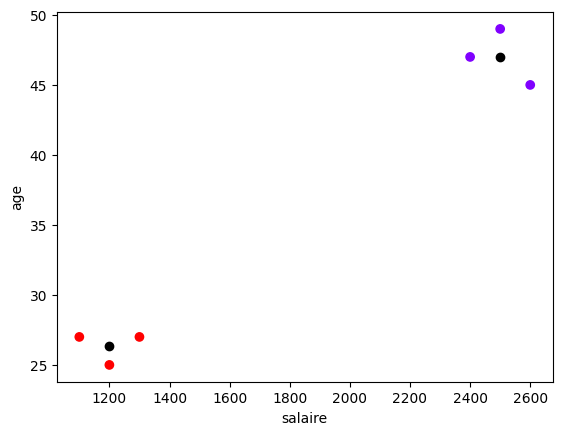

In [2]:
# import sklearn and kmeans
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
km = KMeans(n_clusters=2, random_state=0).fit(df_employes)
centroids = km.cluster_centers_
print(centroids)

# plot the data
plt.scatter(df_employes['salaire'], df_employes['age'], c=km.labels_, cmap='rainbow')
plt.scatter(centroids[:,0] ,centroids[:,1], color='black')
plt.xlabel('salaire')
plt.ylabel('age')
plt.show()

Test avec donénes de test

In [3]:
employe_new=pd.DataFrame([[1300.67,28]], columns=['salaire','age'])
employe_new

,salaire,age
0,1300.67,28


In [4]:
labels=km.predict(df_employes)
km.cluster_centers_

array([[2500.        ,   47.        ],
       [1200.        ,   26.33333333]])

In [5]:
employe_new=pd.DataFrame([[1900.67,40]], columns=['salaire','age'])
employe_new

,salaire,age
0,1900.67,40


**Clustering des données réelles**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
#implementation of csv file
data_path = './employes.csv'

Charger les données CSV employes.csv à partir de Google Drive

In [8]:
df_employes=pd.read_csv(data_path, index_col=0, header=0)
df_employes

,salaire,prime,etat civil,date recrutement
nom,,,,
Ali,1200.675,100.560,celibataire,20/10/2018
Sonia,2800.786,400.876,marie,30/11/2005
Rahma,NaN,130.987,celibataire,04/02/2017
Salma,2500.876,340.600,marie,03/02/2010
Ahmed,3100.760,NaN,marie,09/09/2004
Saleh,1300.876,150.900,celibataire,01/01/2017
Ameni,1100.660,130.870,celibataire,11/05/2019
Mehdi,3000.760,NaN,marie,07/07/2000
Salem,1505.760,159.700,celibataire,21/11/2017


Transformer les données de format brute en format numérique

In [30]:
#make a copy of the data
df_employes_copy=df_employes.copy()

In [32]:
#fill missing values with mean
df_employes_copy['salaire'].fillna(df_employes_copy['salaire'].mean(), inplace=True)
#df_employes.fillna({'salaire':df_employes['salaire'].mean(),
#  'prime':df_employes['prime'].mean()}, inplace=True)
df_employes_copy

,salaire,prime,etat civil,date recrutement
nom,,,,
Ali,1200.675000,100.560000,celibataire,20/10/2018
Sonia,2800.786000,400.876000,marie,30/11/2005
Rahma,2192.082091,130.987000,celibataire,04/02/2017
Salma,2500.876000,340.600000,marie,03/02/2010
Ahmed,3100.760000,257.165889,marie,09/09/2004
Saleh,1300.876000,150.900000,celibataire,01/01/2017
Ameni,1100.660000,130.870000,celibataire,11/05/2019
Mehdi,3000.760000,257.165889,marie,07/07/2000
Salem,1505.760000,159.700000,celibataire,21/11/2017


In [33]:
#convert date to datetime format 
df_employes_copy['date recrutement']=pd.to_datetime(df_employes_copy['date recrutement'])
df_employes_copy

C:\Users\msi\AppData\Local\Temp\ipykernel_14516\1354682102.py:2: UserWarning: Parsing '20/10/2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df_employes_copy['date recrutement']=pd.to_datetime(df_employes_copy['date recrutement'])
C:\Users\msi\AppData\Local\Temp\ipykernel_14516\1354682102.py:2: UserWarning: Parsing '30/11/2005' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df_employes_copy['date recrutement']=pd.to_datetime(df_employes_copy['date recrutement'])
C:\Users\msi\AppData\Local\Temp\ipykernel_14516\1354682102.py:2: UserWarning: Parsing '21/11/2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df_employes_copy['date recrutement']=pd.to_datetime(df_employes_copy['date recrutement'])
C:\Users\msi\AppData\Local\Temp\ipykernel_14516\1354682102.py:2: UserWarning: Parsing '19/02/1999' in DD/MM/YYYY format. Provide f

,salaire,prime,etat civil,date recrutement
nom,,,,
Ali,1200.675000,100.560000,celibataire,2018-10-20
Sonia,2800.786000,400.876000,marie,2005-11-30
Rahma,2192.082091,130.987000,celibataire,2017-04-02
Salma,2500.876000,340.600000,marie,2010-03-02
Ahmed,3100.760000,257.165889,marie,2004-09-09
Saleh,1300.876000,150.900000,celibataire,2017-01-01
Ameni,1100.660000,130.870000,celibataire,2019-11-05
Mehdi,3000.760000,257.165889,marie,2000-07-07
Salem,1505.760000,159.700000,celibataire,2017-11-21


In [34]:
from datetime import datetime
# caluler l'ancienneté et ajouter une colonne
df_employes_copy['anciennete']=df_employes_copy['date recrutement'].apply(lambda x: datetime.now().year - x.year)
df_employes_copy

,salaire,prime,etat civil,date recrutement,anciennete
nom,,,,,
Ali,1200.675000,100.560000,celibataire,2018-10-20,4
Sonia,2800.786000,400.876000,marie,2005-11-30,17
Rahma,2192.082091,130.987000,celibataire,2017-04-02,5
Salma,2500.876000,340.600000,marie,2010-03-02,12
Ahmed,3100.760000,257.165889,marie,2004-09-09,18
Saleh,1300.876000,150.900000,celibataire,2017-01-01,5
Ameni,1100.660000,130.870000,celibataire,2019-11-05,3
Mehdi,3000.760000,257.165889,marie,2000-07-07,22
Salem,1505.760000,159.700000,celibataire,2017-11-21,5


In [35]:
df_employes_copy.drop(['date recrutement'], axis=1, inplace=True)
df_employes_copy

,salaire,prime,etat civil,anciennete
nom,,,,
Ali,1200.675000,100.560000,celibataire,4
Sonia,2800.786000,400.876000,marie,17
Rahma,2192.082091,130.987000,celibataire,5
Salma,2500.876000,340.600000,marie,12
Ahmed,3100.760000,257.165889,marie,18
Saleh,1300.876000,150.900000,celibataire,5
Ameni,1100.660000,130.870000,celibataire,3
Mehdi,3000.760000,257.165889,marie,22
Salem,1505.760000,159.700000,celibataire,5


In [36]:
from sklearn.preprocessing import OneHotEncoder
# convert categorical data to numerical data
OHE=OneHotEncoder().fit(df_employes_copy[['etat civil']])
OHE.categories_

[array(['celibataire', 'marie'], dtype=object)]

In [37]:
etat_civil_sparse=OHE.transform(df_employes_copy[['etat civil']])
etat_civil = etat_civil_sparse.toarray()
etat_civil

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.]])

In [46]:
df_etat_civil=pd.DataFrame(etat_civil,index=df_employes_copy.index ,columns=['etat civil_celibataire','etat civil_marie'])
df_employes_copy=pd.concat([df_employes_copy,df_etat_civil], axis=1)
df_employes_copy.drop(['etat civil'], axis=1, inplace=True)
df_employes_copy

,salaire,prime,anciennete,etat civil_celibataire,etat civil_marie,etat civil_celibataire,etat civil_marie,etat civil_celibataire,etat civil_marie,etat civil_celibataire,etat civil_marie,etat civil_celibataire,etat civil_marie,etat civil_celibataire,etat civil_marie
nom,,,,,,,,,,,,,,,
Ali,1200.675000,100.560000,4,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
Sonia,2800.786000,400.876000,17,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
Rahma,2192.082091,130.987000,5,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
Salma,2500.876000,340.600000,12,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
Ahmed,3100.760000,257.165889,18,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
Saleh,1300.876000,150.900000,5,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
Ameni,1100.660000,130.870000,3,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
Mehdi,3000.760000,257.165889,22,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
Salem,1505.760000,159.700000,5,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


Normaliser les données

In [47]:
from sklearn.preprocessing import  StandardScaler
ss=StandardScaler()
ss.fit(X_)
X_ss=ss.transform(X_)
X_ss

NameError: name 'X_' is not defined

Réduire les dimensions des données

In [ ]:
#

array([[-2.08283845, -0.070833  ],
       [ 1.63874567, -0.38377126],
       [-1.49652918,  0.3748481 ],
       [ 1.17638784, -0.87305816],
       [ 1.77501009, -0.25506935],
       [-1.94954959,  0.05577314],
       [-2.17409741, -0.16783631],
       [ 1.94308214, -0.00578323],
       [-1.83844666,  0.13402604],
       [ 1.91615821,  0.00798055],
       [-1.83620459,  0.20105933],
       [ 2.92828192,  0.98266416]])

Regrouper les données clusters avec Kmeans

In [ ]:
#

KMeans(n_clusters=2)

Prédire les labels des clusters

In [ ]:
#

array([0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1], dtype=int32)

Déterminer les clusters

In [ ]:
#

array([[-2.08283845, -0.070833  ],
       [-1.49652918,  0.3748481 ],
       [-1.94954959,  0.05577314],
       [-2.17409741, -0.16783631],
       [-1.83844666,  0.13402604],
       [-1.83620459,  0.20105933]])

In [ ]:
#

array([[ 1.63874567, -0.38377126],
       [ 1.17638784, -0.87305816],
       [ 1.77501009, -0.25506935],
       [ 1.94308214, -0.00578323],
       [ 1.91615821,  0.00798055],
       [ 2.92828192,  0.98266416]])

Visualiser les données sur un plan 2D colorées selon leurs appartenances aux clusters

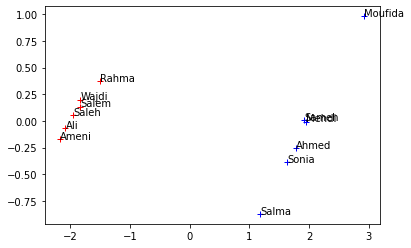

In [ ]:
import matplotlib.pyplot as plt

plt.plot(cluster0[:,0],cluster0[:,1],'r+', label='Cluster 0')
plt.plot(cluster1[:,0],cluster1[:,1],'b+', label='Cluster 1')

for nom, x, y in zip(df_employes.index,X_pca[:,0],X_pca[:,1]):
  plt.annotate(nom, xy =(x, y), xycoords="data")